# Written by - Paul Kang, Ore Quality EIT
# Contact: pkang@suncor.com | +1-(780)-215-4631
# With interest of - Advanced Analytics

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d
from math import sin, cos, pi
import matplotlib.cm as cm
import os
%matplotlib inline
coef = pd.read_csv("/dbfs/mnt/mineeoa-adhoc/data/dry_end/PK_MODEL.csv")

In [0]:
coef.set_index(keys='coefficients',inplace=True)

In [0]:
coef.columns
coef.rename(columns=
    {
        'Int':'Const', 'Fines':'F', 'Tonnage':'T', 'Fines * Tonnage':'FT', 'Fines�':'F2', 'Tonnage�':'T2',
       'Fines� * Tonnage':'F2T', 'Fines * Tonnage�':'FT2', 'Fines�.1':'F3', 'Tonnage�.1':'T3'
    }
    , inplace=True
)

In [0]:
coef

,Const,F,T,FT,F2,T2,F2T,FT2,F3,T3
coefficients,,,,,,,,,,
SB,0.616467,0.066469,0.016490,-0.000977,-0.004142,-0.000469,-0.000028,0.000076,0.000083,-0.000031
SB SCVN,0.615579,0.048871,0.024263,-0.001627,-0.002047,-0.000556,-0.000006,0.000064,0.000025,-0.000024
MM,1.170820,-0.035770,-0.026412,0.002656,0.002840,0.001569,-0.000126,-0.000001,-0.000083,-0.000060
MM SCVN,1.156200,-0.000775,-0.071030,0.008154,-0.002115,0.002663,-0.000200,-0.000171,0.000068,-0.000029


In [0]:
Tonnes = np.linspace(5,16.5,num=24)
Fines = np.linspace(10,21.5,num=24)

df_SB_BPSS_OP = pd.DataFrame(columns=Fines,index=Tonnes)
df_SB_BPSS_CL = pd.DataFrame(columns=Fines,index=Tonnes)
df_MM_BPSS_OP = pd.DataFrame(columns=Fines,index=Tonnes)
df_MM_BPSS_CL = pd.DataFrame(columns=Fines,index=Tonnes)

def Model(coef,F,T,i):
        return coef.iloc[i]['Const'] + coef.iloc[i]['F']*F + \
              coef.iloc[i]['T']*T + coef.iloc[i]['FT']*F*T + \
              coef.iloc[i]['F2']*F**2 + coef.iloc[i]['T2']*T**2 + \
              coef.iloc[i]['F2T']*T*F**2 + coef.iloc[i]['FT2']*F*T**2 + \
              coef.iloc[i]['F3']*F**3 + coef.iloc[i]['T3']*T**3

for i,F in enumerate(Fines):
    for x,T in enumerate(Tonnes):
        df_SB_BPSS_OP.iloc[x,i] = Model(coef,F,T,0)
        df_SB_BPSS_CL.iloc[x,i] = Model(coef,F,T,1)
        df_MM_BPSS_OP.iloc[x,i] = Model(coef,F,T,2)
        df_MM_BPSS_CL.iloc[x,i] = Model(coef,F,T,3)

print(df_SB_BPSS_OP.shape)
print(df_SB_BPSS_CL.shape)
print(df_MM_BPSS_OP.shape)
print(df_MM_BPSS_CL.shape)

(24, 24)
(24, 24)
(24, 24)
(24, 24)

In [0]:
print(Tonnes)
print(Fines)

[ 5. 5.5 6. 6.5 7. 7.5 8. 8.5 9. 9.5 10. 10.5 11. 11.5
 12. 12.5 13. 13.5 14. 14.5 15. 15.5 16. 16.5]
[10. 10.5 11. 11.5 12. 12.5 13. 13.5 14. 14.5 15. 15.5 16. 16.5
 17. 17.5 18. 18.5 19. 19.5 20. 20.5 21. 21.5]

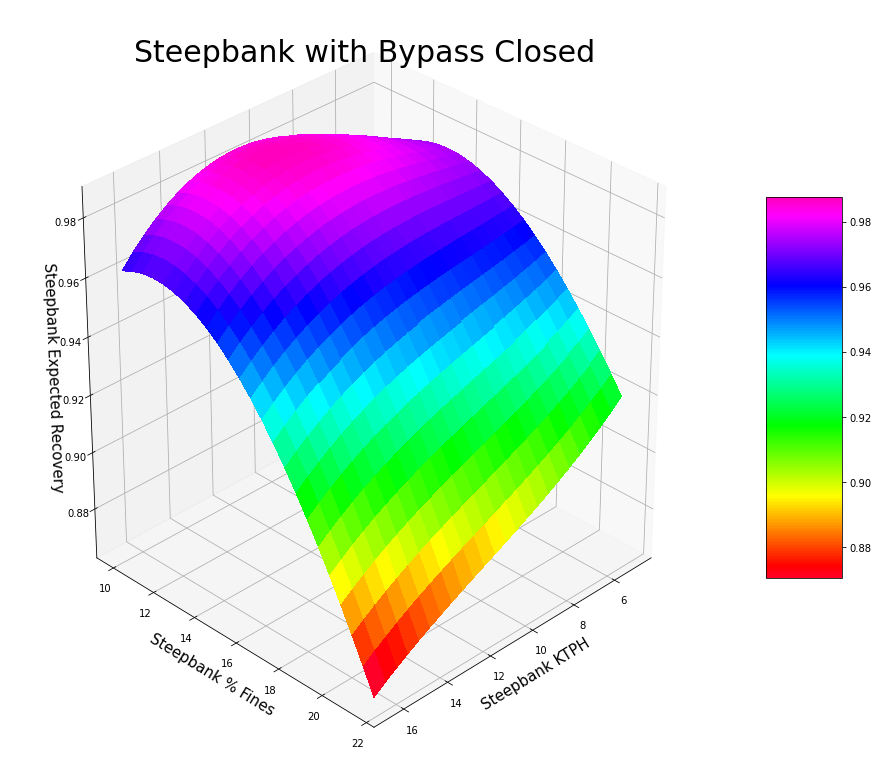

In [0]:
# ----------------------------------------------------------------------
# -------------------- Surface plot ------------------------------------
# ----------------------------------------------------------------------
# Declare Matplotlib figures and determine figure type and size.
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(16,14))

T = Tonnes # is an output array using: np.linspace(5,16.5,24)

F = Fines # is an output array using: np.linspace(10,21.5,24)

T, F = np.meshgrid(T, F) # put our x y axis into meshgrid plot space

# STEEPBANK Primary Extraction Expected Recovery when Bypass is OPENED.
SB_BPSS_OP = Model(coef,F,T,0)

# STEEPBANK Primary Extraction Expected Recovery when Bypass is CLOSED.
SB_BPSS_CL = Model(coef,F,T,1)

# MILLENNIUM Primary Extraction Expected Recovery when Bypass is OPENED.
MM_BPSS_OP = Model(coef,F,T,2)

# MILLENNIUM Primary Extraction Expected Recovery when Bypass is CLOSED.
MM_BPSS_CL = Model(coef,F,T,3)
# Plot the surface.
# Change the label and figure titiles when you use different platns, different configuration.
ax.set_xlabel('Steepbank KTPH',fontdict={'size':15})
ax.set_ylabel('Steepbank % Fines',fontdict={'size':15})
ax.set_zlabel('Steepbank Expected Recovery',fontdict={'size':15})
plt.title('Steepbank with Bypass Closed',fontdict={'size':30})

#plot figure (use SB_BPSS_OP, SB_BPSS_CL, MM_BPSS_OP, MM_BPSS_CL)

surf = ax.plot_surface(T,F,SB_BPSS_CL,linewidth=0, antialiased=False, shade = True, cmap=cm.gist_rainbow)


# Customize the z axis.
# ax.set_zlim(0.5, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
# Change the POV angles.
ax.view_init(30, 45)
plt.show()

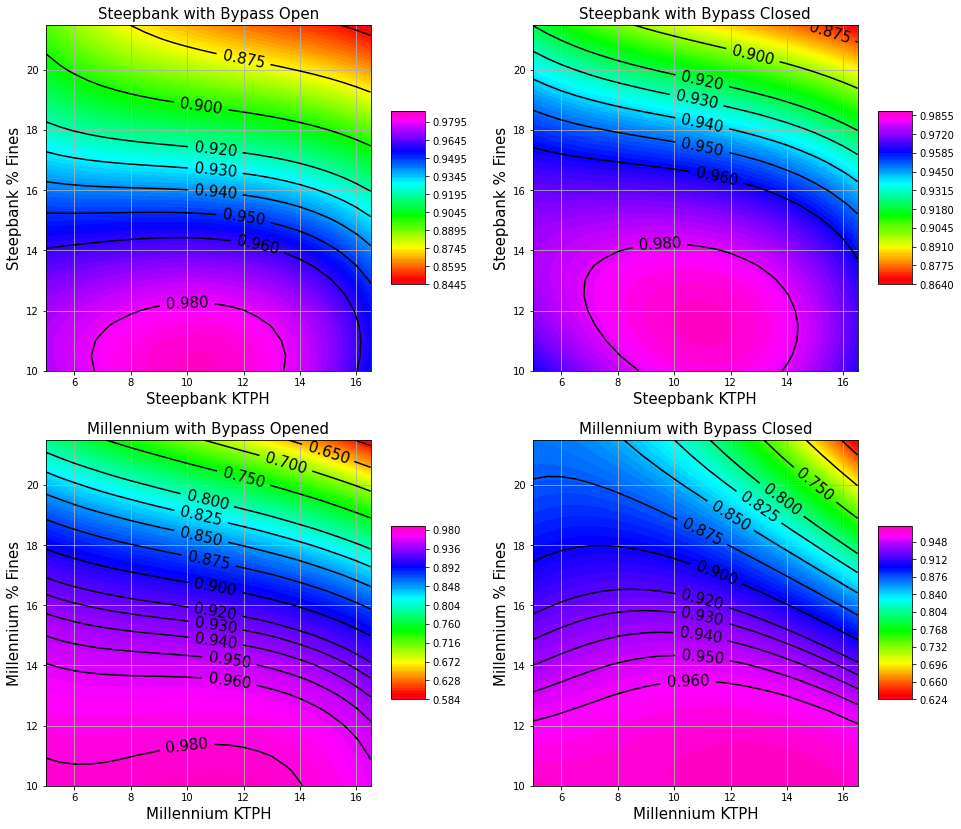

In [0]:
# ----------------------------------------------------------------------
# -------------------- Contour plot ------------------------------------
# ----------------------------------------------------------------------
# Declare Matplotlib figures and determine figure type and size.
fig, ax = plt.subplots(figsize=(16,14))

T = Tonnes # is an output array using: np.linspace(5,16.5,24)

F = Fines # is an output array using: np.linspace(10,21.5,24)

T, F = np.meshgrid(T, F) # put our x y axis into meshgrid plot space

# STEEPBANK Primary Extraction Expected Recovery when Bypass is OPENED.
SB_BPSS_OP = Model(coef,F,T,0)

# STEEPBANK Primary Extraction Expected Recovery when Bypass is CLOSED.
SB_BPSS_CL = Model(coef,F,T,1)

# MILLENNIUM Primary Extraction Expected Recovery when Bypass is OPENED.
MM_BPSS_OP = Model(coef,F,T,2)

# MILLENNIUM Primary Extraction Expected Recovery when Bypass is CLOSED.
MM_BPSS_CL = Model(coef,F,T,3)
# Plot the surface.
# Change the label and figure titiles when you use different platns, different configuration.
level = [0.6,0.65,0.7,0.75,0.8,0.825,0.85,0.875,0.9,0.92,0.93,0.94,0.95,0.96,0.98]

plt.subplot(2,2,1)
plt.title('Steepbank with Bypass Open',fontdict={'size':15})
plt.xlabel('Steepbank KTPH',fontdict={'size':15})
plt.ylabel('Steepbank % Fines',fontdict={'size':15})
#plot figure (use SB_BPSS_OP, SB_BPSS_CL, MM_BPSS_OP, MM_BPSS_CL)
contour = plt.contourf(T,F,SB_BPSS_OP,100,cmap=cm.gist_rainbow)
contour_lines = plt.contour(T,F,SB_BPSS_OP,level,colors='black')
# Add a color bar which maps values to colors.
fig.colorbar(contour, shrink=0.5, aspect=5)
plt.clabel(contour_lines,contour_lines.levels[1::1],fontsize=15)
plt.grid()

plt.subplot(2,2,2)
plt.title('Steepbank with Bypass Closed',fontdict={'size':15})
plt.xlabel('Steepbank KTPH',fontdict={'size':15})
plt.ylabel('Steepbank % Fines',fontdict={'size':15})
contour = plt.contourf(T,F,SB_BPSS_CL,100,cmap=cm.gist_rainbow)
contour_lines = plt.contour(T,F,SB_BPSS_CL,level,colors='black')
# Add a color bar which maps values to colors.
fig.colorbar(contour, shrink=0.5, aspect=5)
plt.clabel(contour_lines,contour_lines.levels[1::1],fontsize=15)
plt.grid()

plt.subplot(2,2,3)
plt.title('Millennium with Bypass Opened',fontdict={'size':15})
plt.xlabel('Millennium KTPH',fontdict={'size':15})
plt.ylabel('Millennium % Fines',fontdict={'size':15})
contour = plt.contourf(T,F,MM_BPSS_OP,100,cmap=cm.gist_rainbow)
contour_lines = plt.contour(T,F,MM_BPSS_OP,level,colors='black')
# Add a color bar which maps values to colors.
fig.colorbar(contour, shrink=0.5, aspect=5)
plt.clabel(contour_lines,contour_lines.levels[1::1],fontsize=15)
plt.grid()

plt.subplot(2,2,4)
plt.title('Millennium with Bypass Closed',fontdict={'size':15})
plt.xlabel('Millennium KTPH',fontdict={'size':15})
plt.ylabel('Millennium % Fines',fontdict={'size':15})
contour = plt.contourf(T,F,MM_BPSS_CL,100,cmap=cm.gist_rainbow)
contour_lines = plt.contour(T,F,MM_BPSS_CL,level,colors='black')
# Add a color bar which maps values to colors.
fig.colorbar(contour, shrink=0.5, aspect=5)
plt.clabel(contour_lines,contour_lines.levels[1::1],fontsize=15)
plt.grid()


Lets see then, what is our maximum tonnage and maximum fines that maintains 93% of recovery at different cases.

i.e.) Assuming Secondary Extraction maintains 98.5% bitumen recovery, and AER regulation specifies our extraction to reach 90%

then the max recov is 0.9/0.985 = 0.914 = 91.4% primary extraction recovery must be maintained. 

lets give 1.5% as our safe buffer for our recovery. ~ 93%

In [0]:

coeff_T = coef.T

target_recov = 0.93

root = []

for F in Fines:
    cofficient = list(coeff_T['MM SCVN']) # Options: 'SB', 'SB SCVN', 'MM', 'MM SCVN'
    
    terms = [1,F,1,F,F**2,1,F**2,F,F**3,1]
    
    poly = [a*b for a, b in zip(cofficient,terms)]
    
    poly = [poly[0]+poly[1]+poly[4]+poly[8]-target_recov
            
            ,poly[2]+poly[3]+poly[6]
            
            ,poly[5]+poly[7]
            
            ,poly[9]]
    
    poly = poly[::-1]
    
    val = np.roots(poly)
    
    root = np.append(root,val)
    
    

real_1 = [root[3*i] for i, r in enumerate(root[:24])]
real_2 = [root[3*i+1] for i ,r in enumerate(root[:24])]
real_3 = [root[3*i+2] for i, r in enumerate(root[:24])]
real = pd.DataFrame({'Soln_1':real_1,'Soln_2':real_2,'Soln_3':real_3},index=Fines)

real

,Soln_1,Soln_2,Soln_3
10.0,23.149669+0.000000j,4.577708+9.423092j,4.577708-9.423092j
10.5,22.411127+0.000000j,3.497826+9.163395j,3.497826-9.163395j
11.0,21.619003+0.000000j,2.444736+8.716581j,2.444736-8.716581j
11.5,20.778221+0.000000j,1.415974+8.054873j,1.415974-8.054873j
12.0,19.891075+0.000000j,0.410395+7.119805j,0.410395-7.119805j
12.5,18.957368+0.000000j,-0.571904+5.778444j,-0.571904-5.778444j
13.0,17.974037+0.000000j,-1.529392+3.593164j,-1.529392-3.593164j
13.5,16.934025+0.000000j,-5.757056+0.000000j,0.839981+0.000000j
14.0,15.823599+0.000000j,-9.535303+0.000000j,2.830348+0.000000j
14.5,-12.540046+0.000000j,14.615637+0.000000j,4.144748+0.000000j


As noted above, to maintain 93%, we have recommendation of ktph at each different scenarios. By design, our sepcells are designed to maintain 5 - 5.5 ktph per cell (Millennium as an example) which leaves that at 11 ktph overall, 16.8% fines is the maximum for SB at bypass open condition. 

Going above and beyond, lets see if I can use this model to calculate bitumen produced, bitumen lost, and rate of bitumen that can be produced to challange 2012 & 2015 recovery equation...

From previous study, we know that we have % bitumen vs % fines relationship as:

% Bitumen / % Fines = 18.807*% Fines ^ -1.182

Let us use this normalized (% bitumen content per % fines normalized over % fines at oilsands) metric to estimate what is usual % bitumen blending will be at respective recorded % fines.

In [0]:

Bitumen = 18.807*(Fines**(-0.182))/100

# Assume bitumen SG == 1.015 g/cm3

BIT_SG = 1.015

# Expected bitumen bbls produced according to my recovery model: % bitumen * Tonnes * % recovery / Bitumen SG * (Conversion from m3 to bbl - 6.289)

BIT_SB_BPSS_OP = pd.DataFrame(columns = Bitumen, index = Tonnes)

BIT_SB_BPSS_CL = pd.DataFrame(columns = Bitumen, index = Tonnes)

BIT_MM_BPSS_OP = pd.DataFrame(columns = Bitumen, index = Tonnes)

BIT_MM_BPSS_CL = pd.DataFrame(columns = Bitumen, index = Tonnes)

for i,B in enumerate(Bitumen):
  for x,T in enumerate(Tonnes):
    BIT_SB_BPSS_OP.iloc[x,i] = df_SB_BPSS_OP.iloc[x,i]*T*B/BIT_SG*6.289
    
    BIT_SB_BPSS_CL.iloc[x,i] = df_SB_BPSS_CL.iloc[x,i]*T*B/BIT_SG*6.289
    
    BIT_MM_BPSS_OP.iloc[x,i] = df_MM_BPSS_OP.iloc[x,i]*T*B/BIT_SG*6.289
    
    BIT_MM_BPSS_CL.iloc[x,i] = df_MM_BPSS_CL.iloc[x,i]*T*B/BIT_SG*6.289
    

col_string = []

for (z,F), (i,B) in zip(enumerate(Fines),enumerate(Bitumen)):
  
  col_string.append(str(round(Bitumen[i]*100,2))+" %")
  
    
BIT_SB_BPSS_OP.columns = col_string

BIT_SB_BPSS_CL.columns = col_string

BIT_MM_BPSS_OP.columns = col_string

BIT_MM_BPSS_CL.columns = col_string

Also, obviously the bitumen lost is % bitumen * Tonnes * (1 - % recovery) * Bitumen SG * (Conversion from m3 to bbl - 6.289)

but we will study this on later analysis.

Now, I want to see what is the production power of a single tonne of oilsands at different rates

In [0]:

RATE_SB_BPSS_OP = pd.DataFrame(columns = col_string,index = Tonnes[:-1])

RATE_SB_BPSS_CL = pd.DataFrame(columns = col_string,index = Tonnes[:-1])

RATE_MM_BPSS_OP = pd.DataFrame(columns = col_string,index = Tonnes[:-1])

RATE_MM_BPSS_CL = pd.DataFrame(columns = col_string,index = Tonnes[:-1])

for i,F in enumerate(Fines):
  for x,T in enumerate(Tonnes[:-1]):
    RATE_SB_BPSS_OP.iloc[x,i] = (BIT_SB_BPSS_OP.iloc[x+1,i] - BIT_SB_BPSS_OP.iloc[x,i])/0.5 # dividing by 0.5 because the tonnes increment is by 0.5 ktph.
    
    RATE_SB_BPSS_CL.iloc[x,i] = (BIT_SB_BPSS_CL.iloc[x+1,i] - BIT_SB_BPSS_CL.iloc[x,i])/0.5
    
    RATE_MM_BPSS_OP.iloc[x,i] = (BIT_MM_BPSS_OP.iloc[x+1,i] - BIT_MM_BPSS_OP.iloc[x,i])/0.5
    
    RATE_MM_BPSS_CL.iloc[x,i] = (BIT_MM_BPSS_CL.iloc[x+1,i] - BIT_MM_BPSS_CL.iloc[x,i])/0.5


RATE_SB_BPSS_OP = RATE_SB_BPSS_OP.astype(float)
RATE_SB_BPSS_OP = RATE_SB_BPSS_OP.round(3)
RATE_SB_BPSS_CL = RATE_SB_BPSS_CL.astype(float)
RATE_SB_BPSS_CL = RATE_SB_BPSS_CL.round(3)
RATE_MM_BPSS_OP = RATE_MM_BPSS_OP.astype(float)
RATE_MM_BPSS_OP = RATE_MM_BPSS_OP.round(3)
RATE_MM_BPSS_CL = RATE_MM_BPSS_CL.astype(float)
RATE_MM_BPSS_CL = RATE_MM_BPSS_CL.round(3)
RATE_MM_BPSS_CL



,12.37 %,12.26 %,12.16 %,12.06 %,11.96 %,11.88 %,11.79 %,11.71 %,11.63 %,11.56 %,11.49 %,11.42 %,11.35 %,11.29 %,11.23 %,11.17 %,11.11 %,11.06 %,11.0 %,10.95 %,10.9 %,10.85 %,10.81 %,10.76 %
5.0,0.741,0.737,0.732,0.727,0.721,0.715,0.708,0.702,0.695,0.687,0.680,0.672,0.664,0.656,0.648,0.640,0.631,0.623,0.615,0.606,0.598,0.590,0.582,0.574
5.5,0.742,0.738,0.733,0.728,0.723,0.717,0.711,0.704,0.697,0.689,0.682,0.674,0.665,0.657,0.648,0.640,0.631,0.622,0.612,0.603,0.594,0.585,0.576,0.567
6.0,0.743,0.739,0.735,0.730,0.725,0.719,0.713,0.706,0.699,0.691,0.683,0.675,0.666,0.657,0.648,0.638,0.629,0.619,0.609,0.599,0.589,0.579,0.569,0.559
6.5,0.744,0.741,0.737,0.732,0.727,0.721,0.714,0.707,0.700,0.692,0.683,0.675,0.665,0.656,0.646,0.636,0.625,0.615,0.604,0.593,0.582,0.571,0.560,0.548
7.0,0.745,0.742,0.738,0.734,0.728,0.722,0.716,0.708,0.700,0.692,0.683,0.674,0.664,0.654,0.643,0.632,0.621,0.609,0.598,0.586,0.574,0.561,0.549,0.536
7.5,0.747,0.744,0.740,0.735,0.730,0.723,0.716,0.709,0.700,0.692,0.682,0.672,0.662,0.651,0.639,0.627,0.615,0.603,0.590,0.577,0.563,0.550,0.536,0.522
8.0,0.749,0.745,0.741,0.736,0.731,0.724,0.717,0.709,0.700,0.690,0.680,0.669,0.658,0.646,0.634,0.621,0.608,0.594,0.581,0.566,0.552,0.537,0.522,0.506
8.5,0.750,0.747,0.743,0.737,0.731,0.724,0.716,0.708,0.698,0.688,0.677,0.666,0.654,0.641,0.628,0.614,0.599,0.585,0.570,0.554,0.538,0.522,0.505,0.489
9.0,0.752,0.748,0.744,0.738,0.731,0.724,0.715,0.706,0.696,0.685,0.673,0.661,0.648,0.634,0.620,0.605,0.589,0.573,0.557,0.540,0.523,0.505,0.487,0.469
9.5,0.753,0.749,0.744,0.738,0.731,0.723,0.714,0.704,0.693,0.681,0.669,0.655,0.641,0.626,0.611,0.595,0.578,0.561,0.543,0.524,0.506,0.486,0.467,0.447


What I have just done is, at different tonnage rate and expected % bitumen according to % fines, what is my expected bitumen production per tonne of oilsands increasing. 

This get me thinking that if what I just did is measuring the rate of change of the bitumen that can be produced (bitumen production power), then these numbers are then can be compared with 2012 and 2015 rbbl/t numbers and see if single tonne of oilsand increase will yield better/worse result.

Syncrude recovery equation (adopted by Suncor 2012) is as follows:


2015 OPI initiative states the following

2012 rbbl/t Equation:

IF % bitumen > 10%, 

   2012 recovery = 89.487+ % bitumen * 0.383058 - % Fines *0.07184
   
else

   if MSE > 88,
   
        2012 recovery = MSE
        
   else
   
        2012 recovery = MSE + 2 - (88-MSE)/18
        
Where:

   MSE = 1.004*((32.6*(% Bitumen)^0.4263)+119*(% Fines ^ -0.1213) - 91) + 2

   2012 rbbl/t = 2012 recovery % * % bitumen * Bitumen_SG * (conversion from m3 to bbl - 6.289)




2015 rbbl/t Equation: 

(**technically... 2015 recovery equation holds true till Steepbank MB reaches 300, Millennium MB reaches 250)

if Plant = SB

   if SB_MB < 235
   
        2015 recovery = 92.1+0.253 * % Bitumen - 0.00566 * MB
        
   else
   
        2015 recovery = 32.5 + 0.573 * MB - 0.00134 * MB ^2
        
if Plant = MM

   if MM_MB < 175
   
        2015 recovery = 83.65 + 1.029 * % Bitumen - 0.0169 * MB
        
   else
   
        2015 recovery = 68.5 + 0.38 * MB - 0.0012 * MB ^2

In [0]:
# Creating 2015 and 2012 recovery equation:
rbbl_2012 = []
rbbl_2015_MM = []
rbbl_2015_SB = []
MSE = [1.004*((32.6*(((B)**0.4263))+119*(((F/100)**(-0.1213)))) - 91) + 2 for B,F in zip(Bitumen,Fines)]

# For 2012 rbbl
for B, F, value in zip(Bitumen,Fines,MSE):
  if B > 0.1:
    rbbl_2012.append((89.487+ B*100*0.383058 - F*0.07184)/100*B/BIT_SG*6.289)
  elif value > 88:
    rbbl_2012.append(value)
  else:
    rbbl_2012.append(value + 2 - (88-value)/18)
    
# For 2015 rbbl
MBI = 13.334*Fines - 18.389

for B,MB in zip(Bitumen,MBI):
  if MB < 235:
    rbbl_2015_SB.append((92.1 + 0.253*B - 0.00566*MB)/100*B/BIT_SG*6.289)
  else:
    rbbl_2015_SB.append((32.5 + 0.573*MB - 0.00134*MB**2)/100*B/BIT_SG*6.289)
  
  if MB < 175:
    rbbl_2015_MM.append((83.65 + 1.029*B - 0.0169*MB)/100*B/BIT_SG*6.289)
  else:
    rbbl_2015_MM.append((68.5 + 0.38*MB - 0.0012*MB**2)/100*B/BIT_SG*6.289)
    



In [0]:
# def select_col(x):
#     c1 = 'color: red'
#     c2 = '' 
#     #DataFrame with same index and columns names as original filled empty strings
#     df1 =  pd.DataFrame(c2, index=x.index, columns=x.columns)
#     #compare columns
#     for col,(i,val) in zip(x,enumerate(Fines)):
#       mask = x[col] < rbbl_2012[i]
#       df1.loc[mask, col] = c1
#     return df1
RATE_SB_BPSS_OP.columns = Fines
RATE_SB_BPSS_CL.columns = Fines
RATE_MM_BPSS_OP.columns = Fines
RATE_MM_BPSS_CL.columns = Fines

# Let us see what is the maximum limits of the allowable bitumen production rate change.

RATE_SB_BPSS_OP_lim = []
RATE_SB_BPSS_OP_lim_T = []

RATE_SB_BPSS_CL_lim = []
RATE_SB_BPSS_CL_lim_T = []

RATE_MM_BPSS_OP_lim = []
RATE_MM_BPSS_OP_lim_T = []

RATE_MM_BPSS_CL_lim = []
RATE_MM_BPSS_CL_lim_T = []

for i,F in enumerate(Fines):
  for j,T in enumerate(Tonnes):
    if RATE_SB_BPSS_OP.iloc[j,i] < rbbl_2012[i]:
      RATE_SB_BPSS_OP_lim.append(RATE_SB_BPSS_OP.iloc[j,i])
      RATE_SB_BPSS_OP_lim_T.append(T)
      break
      
      
for i,F in enumerate(Fines):
  for j,T in enumerate(Tonnes):
    if RATE_SB_BPSS_CL.iloc[j,i] < rbbl_2012[i]:
      RATE_SB_BPSS_CL_lim.append(RATE_SB_BPSS_CL.iloc[j,i])
      RATE_SB_BPSS_CL_lim_T.append(T)
      break
      
      
for i,F in enumerate(Fines):
  for j,T in enumerate(Tonnes):
    if RATE_MM_BPSS_OP.iloc[j,i] < rbbl_2012[i]:
      RATE_MM_BPSS_OP_lim.append(RATE_MM_BPSS_OP.iloc[j,i])
      RATE_MM_BPSS_OP_lim_T.append(T)
      break
      
      
for i,F in enumerate(Fines):
  for j,T in enumerate(Tonnes[:-1]):
    if RATE_MM_BPSS_CL.iloc[j,i] < rbbl_2012[i]:
      RATE_MM_BPSS_CL_lim.append(RATE_MM_BPSS_CL.iloc[j,i])
      RATE_MM_BPSS_CL_lim_T.append(T)
      break
      
      
RATE_SB_BPSS_OP_lim = pd.DataFrame({'SB_BPSS_OP_2012':RATE_SB_BPSS_OP_lim,'Tonnes':RATE_SB_BPSS_OP_lim_T},index=Fines)
RATE_SB_BPSS_CL_lim = pd.DataFrame({'SB_BPSS_CL_2012':RATE_SB_BPSS_CL_lim,'Tonnes':RATE_SB_BPSS_CL_lim_T},index=Fines)
RATE_MM_BPSS_OP_lim = pd.DataFrame({'MM_BPSS_OP_2012':RATE_MM_BPSS_OP_lim,'Tonnes':RATE_MM_BPSS_OP_lim_T},index=Fines)
RATE_MM_BPSS_CL_lim = pd.DataFrame({'MM_BPSS_CL_2012':RATE_MM_BPSS_CL_lim,'Tonnes':RATE_MM_BPSS_CL_lim_T},index=Fines[:-1])

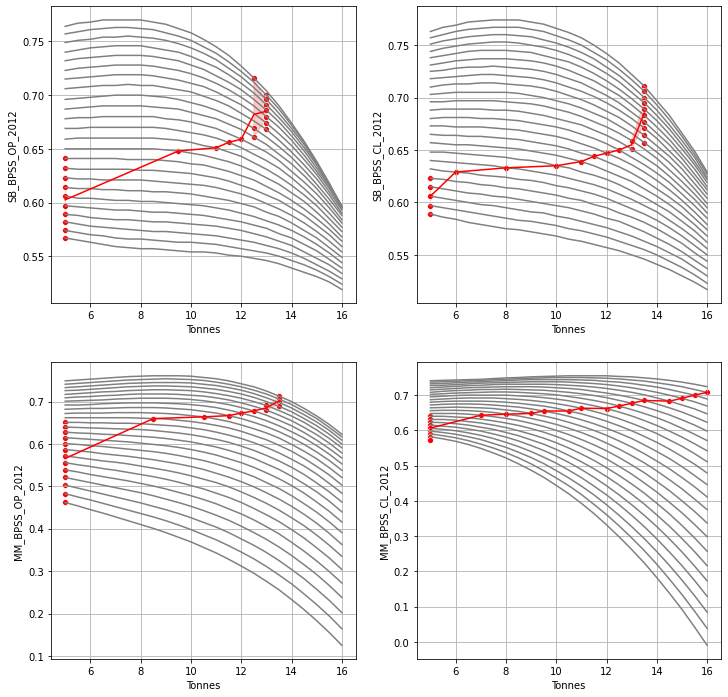

In [0]:
# So now, what we have is for each different tonnage rate, we have rate of change of bitumen production power given the certain ore quality (% fines and % bitumen). Let us visualize this.
fig, axes = plt.subplots(2,2,figsize = (12,12))

for i,F in enumerate(Fines): 
  sns.lineplot(ax=axes[0,0],x=RATE_SB_BPSS_OP.index ,y=F, data = RATE_SB_BPSS_OP, color='grey')
  sns.lineplot(ax=axes[0,1],x=RATE_SB_BPSS_CL.index ,y=F, data = RATE_SB_BPSS_CL, color='grey')
  sns.lineplot(ax=axes[1,0],x=RATE_MM_BPSS_OP.index ,y=F, data = RATE_MM_BPSS_OP, color='grey')

for i,F in enumerate(Fines[:-1]):
  sns.lineplot(ax=axes[1,1],x=RATE_MM_BPSS_CL.index ,y=F, data = RATE_MM_BPSS_CL, color='grey')

sns.lineplot(ax=axes[0,0],x='Tonnes',y='SB_BPSS_OP_2012',data=RATE_SB_BPSS_OP_lim,color='red')
sns.scatterplot(ax=axes[0,0],x='Tonnes',y='SB_BPSS_OP_2012',data=RATE_SB_BPSS_OP_lim,color='red')
axes[0,0].grid()
sns.lineplot(ax=axes[0,1],x='Tonnes',y='SB_BPSS_CL_2012',data=RATE_SB_BPSS_CL_lim,color='red')
sns.scatterplot(ax=axes[0,1],x='Tonnes',y='SB_BPSS_CL_2012',data=RATE_SB_BPSS_CL_lim,color='red')
axes[0,1].grid()
sns.lineplot(ax=axes[1,0],x='Tonnes',y='MM_BPSS_OP_2012',data=RATE_MM_BPSS_OP_lim,color='red')
sns.scatterplot(ax=axes[1,0],x='Tonnes',y='MM_BPSS_OP_2012',data=RATE_MM_BPSS_OP_lim,color='red')
axes[1,0].grid()
sns.lineplot(ax=axes[1,1],x='Tonnes',y='MM_BPSS_CL_2012',data=RATE_MM_BPSS_CL_lim,color='red')
sns.scatterplot(ax=axes[1,1],x='Tonnes',y='MM_BPSS_CL_2012',data=RATE_MM_BPSS_CL_lim,color='red')
axes[1,1].grid()

so pretty much anything that is below the red line is indicating the increase in tonnes, regardless of its recovery,

will yield lower bbl/t recovered for the same "rbbl/t" that we are feeding to our sep cells. it is the rate of change that gets lowered,

which in turn, it means that the recovery equation is tricking people because it fails to address various tonnes of each of the sep cells.


Interesting finding is, I observe different pattern between steepbank and Millennium. when we look at the dots at 5 ktph (verticals), it is the lines where

whatever the tonnes that we run at in those fines range, bbl/t that we can recover by increasing rates is lesser than what we put in. but as you can see,

you would expect that at higher fines, we tend to have that effect more pronounced, which means at higher fines, as we increase tonnes, the bbl/t gets reduced exponentially

but Steepbank, the effect gets flattened out. this can mean 2 things: not enough data, or some other engineering explanation for P300 sep cells.

this gets me to think that this analysis is a wrong approach. % bitumen always change, and there is no single correlation that explains % bitumen and % fines. the one that I used above is normalized, y/x vs x relationship, forcing it to go and have power relationship. Yes, it correlates well. but this doesn't mean that the whole variability of bit and fines is explainable. this will also greatly affect the whole numbers and metrics on the analysis followed by the bitumen % usage.

this alludes to the fact that I need to redo the analysis starting from the recovery % data. in this approach, I am going to start over.

# Partial Differential Equations

In [0]:
from IPython.display import Image 
from IPython.core.display import HTML 
Image(url= "https://edsdevarmstauw2008.blob.core.windows.net/mineeoa-adhoc/data/dry_end/PDE.jpg")

In [0]:
coef

,Const,F,T,FT,F2,T2,F2T,FT2,F3,T3
coefficients,,,,,,,,,,
SB,0.616467,0.066469,0.016490,-0.000977,-0.004142,-0.000469,-0.000028,0.000076,0.000083,-0.000031
SB SCVN,0.615579,0.048871,0.024263,-0.001627,-0.002047,-0.000556,-0.000006,0.000064,0.000025,-0.000024
MM,1.170820,-0.035770,-0.026412,0.002656,0.002840,0.001569,-0.000126,-0.000001,-0.000083,-0.000060
MM SCVN,1.156200,-0.000775,-0.071030,0.008154,-0.002115,0.002663,-0.000200,-0.000171,0.000068,-0.000029


In [0]:
def first_order_PDE_fx(coef,F,T,i):
  return coef.iloc[i]['F'] + coef.iloc[i]['FT']*T + coef.iloc[i]['FT2']*(T**2) + (2*coef.iloc[i]['F2'] + 2*coef.iloc[i]['F2T']*T)*F + \
        3*coef.iloc[i]['F3']*F**2

def first_order_PDE_fy(coef,F,T,i):
  return coef.iloc[i]['T'] + coef.iloc[i]['FT']*F + coef.iloc[i]['F2T']*(F**2) + (2*coef.iloc[i]['T2'] + 2*coef.iloc[i]['FT2']*F)*T + \
        3*coef.iloc[i]['T3']*T**2

def second_order_PDE_fxx(coef,F,T,i):
  return coef.iloc[i]['F2']*2 + 2*coef.iloc[i]['F2T']*T + 6*coef.iloc[i]['F3']*F

def second_order_PDE_fxy(coef,F,T,i):
  return coef.iloc[i]['FT'] + 2*coef.iloc[i]['F2T']*F + 2*coef.iloc[i]['FT2']*T

def second_order_PDE_fyy(coef,F,T,i):
  return coef.iloc[i]['T2']*2 + 2*coef.iloc[i]['FT2']*F + 6*coef.iloc[i]['T3']*T


In [0]:
# First partial derivatives
SB_BPSS_OP_del_fx = pd.DataFrame(columns = Fines, index = Tonnes)
SB_BPSS_OP_del_fy = pd.DataFrame(columns = Fines, index = Tonnes)
# Second Partial Derivatives
SB_BPSS_OP_del_fxx = pd.DataFrame(columns = Fines, index = Tonnes)
SB_BPSS_OP_del_fxy = pd.DataFrame(columns = Fines, index = Tonnes) # note in Jacobian, fxy == fyx
SB_BPSS_OP_del_fyy = pd.DataFrame(columns = Fines, index = Tonnes)
# Then, it becomes iterations...

SB_BPSS_CL_del_fx = pd.DataFrame(columns = Fines, index = Tonnes)
SB_BPSS_CL_del_fy = pd.DataFrame(columns = Fines, index = Tonnes)
SB_BPSS_CL_del_fxx = pd.DataFrame(columns = Fines, index = Tonnes)
SB_BPSS_CL_del_fxy = pd.DataFrame(columns = Fines, index = Tonnes) # note in Jacobian, fxy == fyx
SB_BPSS_CL_del_fyy = pd.DataFrame(columns = Fines, index = Tonnes)

MM_BPSS_OP_del_fx = pd.DataFrame(columns = Fines, index = Tonnes)
MM_BPSS_OP_del_fy = pd.DataFrame(columns = Fines, index = Tonnes)
MM_BPSS_OP_del_fxx = pd.DataFrame(columns = Fines, index = Tonnes)
MM_BPSS_OP_del_fxy = pd.DataFrame(columns = Fines, index = Tonnes) # note in Jacobian, fxy == fyx
MM_BPSS_OP_del_fyy = pd.DataFrame(columns = Fines, index = Tonnes)

MM_BPSS_CL_del_fx = pd.DataFrame(columns = Fines, index = Tonnes)
MM_BPSS_CL_del_fy = pd.DataFrame(columns = Fines, index = Tonnes)
MM_BPSS_CL_del_fxx = pd.DataFrame(columns = Fines, index = Tonnes)
MM_BPSS_CL_del_fxy = pd.DataFrame(columns = Fines, index = Tonnes) # note in Jacobian, fxy == fyx
MM_BPSS_CL_del_fyy = pd.DataFrame(columns = Fines, index = Tonnes)

for i,F in enumerate(Fines):
  for j,T in enumerate(Tonnes):
    SB_BPSS_OP_del_fx.iloc[j,i] = first_order_PDE_fx(coef,F,T,0)
    SB_BPSS_CL_del_fx.iloc[j,i] = first_order_PDE_fx(coef,F,T,1)
    MM_BPSS_OP_del_fx.iloc[j,i] = first_order_PDE_fx(coef,F,T,2)
    MM_BPSS_CL_del_fx.iloc[j,i] = first_order_PDE_fx(coef,F,T,3)
    
    SB_BPSS_OP_del_fy.iloc[j,i] = first_order_PDE_fy(coef,F,T,0)
    SB_BPSS_CL_del_fy.iloc[j,i] = first_order_PDE_fy(coef,F,T,1)
    MM_BPSS_OP_del_fy.iloc[j,i] = first_order_PDE_fy(coef,F,T,2)
    MM_BPSS_CL_del_fy.iloc[j,i] = first_order_PDE_fy(coef,F,T,3)
    
    SB_BPSS_OP_del_fyy.iloc[j,i] = second_order_PDE_fyy(coef,F,T,0)
    SB_BPSS_CL_del_fyy.iloc[j,i] = second_order_PDE_fyy(coef,F,T,1)
    MM_BPSS_OP_del_fyy.iloc[j,i] = second_order_PDE_fyy(coef,F,T,2)
    MM_BPSS_CL_del_fyy.iloc[j,i] = second_order_PDE_fyy(coef,F,T,3)
    
    SB_BPSS_OP_del_fxx.iloc[j,i] = second_order_PDE_fxx(coef,F,T,0)
    SB_BPSS_CL_del_fxx.iloc[j,i] = second_order_PDE_fxx(coef,F,T,1)
    MM_BPSS_OP_del_fxx.iloc[j,i] = second_order_PDE_fxx(coef,F,T,2)
    MM_BPSS_CL_del_fxx.iloc[j,i] = second_order_PDE_fxx(coef,F,T,3)
    
    SB_BPSS_OP_del_fxy.iloc[j,i] = second_order_PDE_fxy(coef,F,T,0)
    SB_BPSS_CL_del_fxy.iloc[j,i] = second_order_PDE_fxy(coef,F,T,1)
    MM_BPSS_OP_del_fxy.iloc[j,i] = second_order_PDE_fxy(coef,F,T,2)
    MM_BPSS_CL_del_fxy.iloc[j,i] = second_order_PDE_fxy(coef,F,T,3)

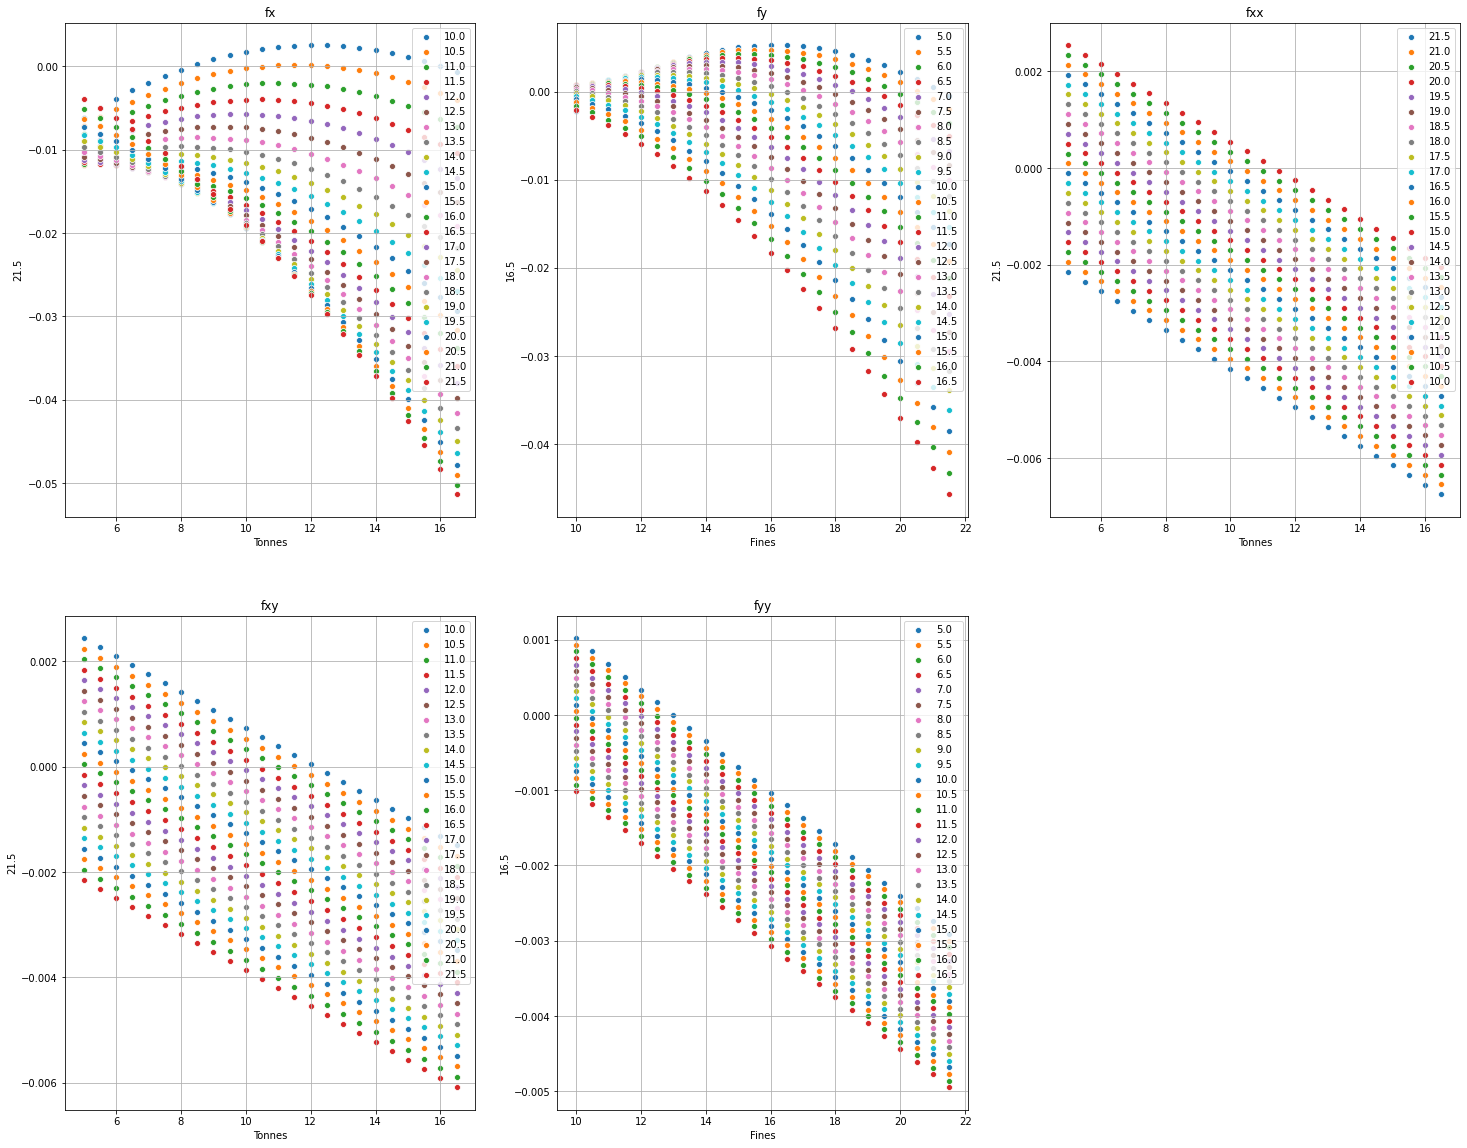

In [0]:
plt.figure(figsize=(25,20))
plt.subplot(2,3,1)
for F in Fines:
  sns.scatterplot(x=MM_BPSS_CL_del_fx.index,y=F,data=MM_BPSS_CL_del_fx)
plt.title('fx')
plt.xlabel('Tonnes')
plt.grid()
plt.legend(Fines,loc=1)

plt.subplot(2,3,2)
for T in Tonnes:
  sns.scatterplot(x=MM_BPSS_CL_del_fy.T.index,y=T,data=MM_BPSS_CL_del_fy.T)
plt.title('fy')
plt.xlabel('Fines')
plt.grid()
plt.legend(Tonnes,loc=1)

plt.subplot(2,3,3)
for F in Fines:
  sns.scatterplot(x=MM_BPSS_CL_del_fxx.index,y=F,data=MM_BPSS_CL_del_fxx)
plt.title('fxx')
plt.xlabel('Tonnes')
plt.grid()
plt.legend(Fines[::-1])

plt.subplot(2,3,4)
for F in Fines:
  sns.scatterplot(x=MM_BPSS_CL_del_fxy.index,y=F,data=MM_BPSS_CL_del_fxy)
plt.title('fxy')
plt.xlabel('Tonnes')
plt.grid()
plt.legend(Fines)

plt.subplot(2,3,5)
for T in Tonnes:
  sns.scatterplot(x=MM_BPSS_CL_del_fyy.T.index,y=T,data=MM_BPSS_CL_del_fyy.T)  
plt.title('fyy')
plt.xlabel('Fines')
plt.grid()
plt.legend(Tonnes,loc=1)

From the visualization, we need to think two things:

1. curvature - slope behaviors and see where it hits the max and see where it gets decreasing. for the curves that always stays negative, is a point in fines where at that fines, as we increase tonnes, we are going to reduce our recovery, no matter what we do.

2. concavity - second order partial derivative: find out where the concavity starts to show zero. at each different fines, we will have a tonnage point where the recovery will dip down significantly, that its reduction acceleration is maximized. we need to find out a point where it starts. Remember, it is NOT a point where recovery reductions starts. 

From what I see in F_y (change of recovery w.r.t change in Fines at different ktph), after 16% fines, whatever the tonnes that we push for, the slope of the recovery declines. anything below 16%, processability was not getting affected, more you put in, more you get out, numerically, since the denominator of (1-bitlost/bitfed) gets larger, recovery gets larger. However, things gets different after this mark.

after 16%, from the contour plots that we saw, we saw that when steepbank bypass closed, the plant was able to exert 93% recov at 19% fines with 13.5 ktph. However, at that range, the f_x and f_y, and its concavity clearly tells that it is in the boundary where the recovery will decrease no matter what. 

It seems that f_y is the only graph that adds value to the current analysis. lets plot everything

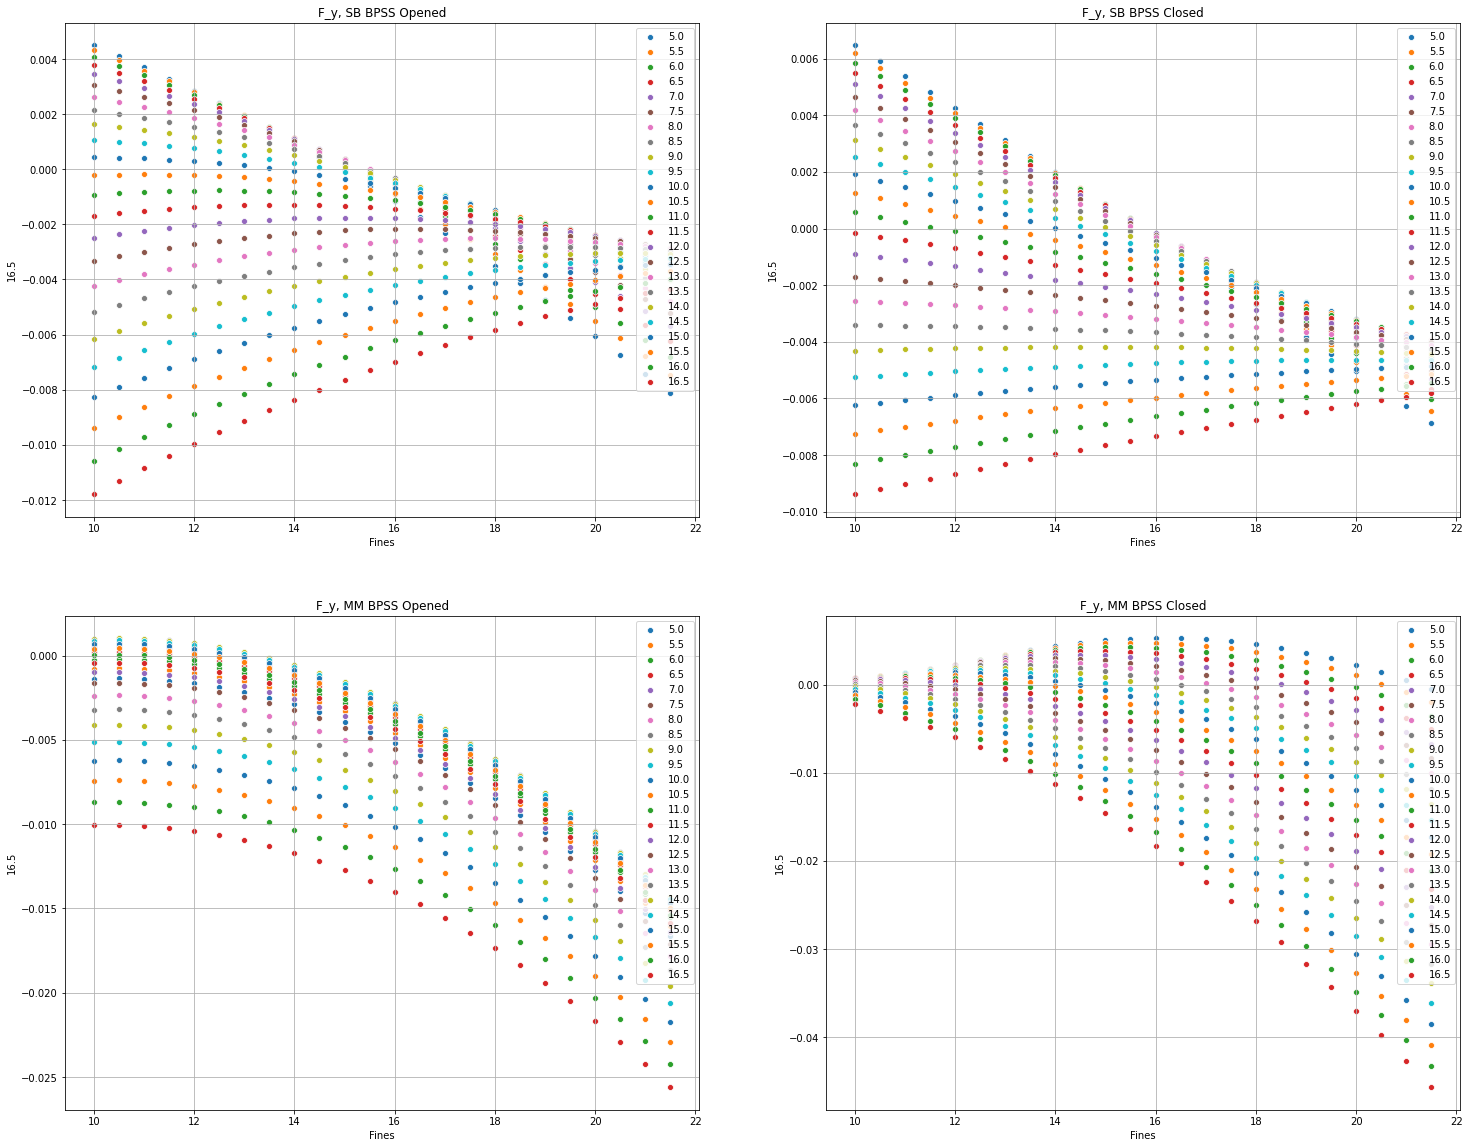

In [0]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
for T in Tonnes:
  sns.scatterplot(x=SB_BPSS_OP_del_fy.T.index,y=T,data=SB_BPSS_OP_del_fy.T)
plt.title('F_y, SB BPSS Opened')
plt.xlabel('Fines')
plt.grid()
plt.legend(Tonnes,loc=1)

plt.subplot(2,2,2)
for T in Tonnes:
  sns.scatterplot(x=SB_BPSS_CL_del_fy.T.index,y=T,data=SB_BPSS_CL_del_fy.T)
plt.title('F_y, SB BPSS Closed')
plt.xlabel('Fines')
plt.grid()
plt.legend(Tonnes,loc=1)

plt.subplot(2,2,3)
for T in Tonnes:
  sns.scatterplot(x=MM_BPSS_OP_del_fy.T.index,y=T,data=MM_BPSS_OP_del_fy.T)
plt.title('F_y, MM BPSS Opened')
plt.xlabel('Fines')
plt.grid()
plt.legend(Tonnes,loc=1)

plt.subplot(2,2,4)
for T in Tonnes:
  sns.scatterplot(x=MM_BPSS_CL_del_fy.T.index,y=T,data=MM_BPSS_CL_del_fy.T)
plt.title('F_y, MM BPSS Closed')
plt.xlabel('Fines')
plt.grid()
plt.legend(Tonnes,loc=1)


so... 
1. in Steepbank, whether if it is bypass open or not, after 16% fines, recovery slope goes negative, on any tonnes.
2. for Millennium, anything that is lesser than 8 ktph is either considered sub optimal zone for 2 OPP operation, or 1 OPP operation. I am going to make decision after 8 ktph, which leaves me that when bypass is open, anything after 13.5% fines, recovery starts to drop, anything after 17%, recovery starts to drop at any tonnage after 8 ktph.
3. 6.5 - 8 ktph range at Millennium is most likely going to be 2 into 1 OPP, and sub optimal 2 into 2 operation. at this range, the data that is 13 - 16.5 ktph is used for statistical inference.

Let us find 93% recovery marks on each plant and at each operating configuration.

In [0]:

target_recov = 0.93

root = []

for F in Fines:
    cofficient = list(coeff_T['SB SCVN']) # Options: 'SB', 'SB SCVN', 'MM', 'MM SCVN'
    
    terms = [1,F,1,F,F**2,1,F**2,F,F**3,1]
    
    poly = [a*b for a, b in zip(cofficient,terms)]
    
    poly = [poly[0]+poly[1]+poly[4]+poly[8]-target_recov
            
            ,poly[2]+poly[3]+poly[6]
            
            ,poly[5]+poly[7]
            
            ,poly[9]]
    
    poly = poly[::-1]
    
    val = np.roots(poly)
    
    root = np.append(root,val)
    
    

real_1 = [root[3*i] for i, r in enumerate(root[:24])]
real_2 = [root[3*i+1] for i ,r in enumerate(root[:24])]
real_3 = [root[3*i+2] for i, r in enumerate(root[:24])]
real = pd.DataFrame({'Soln_1':real_1,'Soln_2':real_2,'Soln_3':real_3},index=Fines)

real

,Soln_1,Soln_2,Soln_3
10.0,19.106920+0.000000j,-16.329527+0.000000j,0.722607+0.000000j
10.5,19.265177+0.000000j,-14.128222+0.000000j,-0.303622+0.000000j
11.0,19.383075+0.000000j,-11.594516+0.000000j,-1.621893+0.000000j
11.5,19.461406+0.000000j,-7.946558+0.000000j,-4.014848+0.000000j
12.0,19.500083+0.000000j,-5.333375+3.908873j,-5.333375-3.908873j
12.5,19.498169+0.000000j,-4.665751+5.711224j,-4.665751-5.711224j
13.0,19.453831+0.000000j,-3.976916+6.941930j,-3.976916-6.941930j
13.5,19.364216+0.000000j,-3.265442+7.875591j,-3.265442-7.875591j
14.0,19.225230+0.000000j,-2.529281+8.610542j,-2.529281-8.610542j
14.5,19.031176+0.000000j,-1.765588+9.195166j,-1.765588-9.195166j


In [0]:
real.dtypes

Out[987]: Soln_1 complex128
Soln_2 complex128
Soln_3 complex128
dtype: object

# Conclusion